# Activation Functions

## The Step Activation Function

    if weights * inputs + bias >0 THEN neuron will fire and output a 1, otherwise it will output a  0



## The Linear Activation Function

    Equation of a line y=x and the output value equals the input. 
    Usually applied to the last layer's output in the casae of a regression model(scaler value).

## The Sigmoid Activation Function

    Better than step funtion due the need of optimizers. Sigmoid is more granular and informative. Used in Hidden Layers

    y= 1/(1+e^-x)

    y=0 and x=-inf,  y=0.5 at x=0,  y= 1 at x=inf

    works better with NN due to range between 0 and 1, also keeps all information(Reversible)

    Adds non linearity.

    Sigmoid eventually gets replaced by Rectified Linear Units (ReLU)

## The Rectified Linear Activation Function

    ReLU is close to being a linear one but remains non-linear due to the bend after 0

    y=x when x>0
    y=0 when x<0

    Simple yet powerful activation funtion is the most widely used due to speed and efficiency.

## Linear Activation in the Hidden Layers

        No matter what we do with the neurons' weights and biases, the outputs will always be perfectly linear to y=x. This linear nature will continue throughout the entire network
        

## ReLU Activation in a Pair of Neurons

        We can see that by using ReLU activation, with different sets of weights(-/+) the slope can change and biases(left/right shift) cause horizontal movement. With the addition of another neuron, now we have 2...the bias of the second neuron shifted the function Vertically. With the 2nd nuerons weight to a -, we now have a neuron that has an activation and deactivation point, whne both neurons are active, they produce values in the range of the granulae, variable, and output. If any neuron is inactive, the pair will produce non-variable output.
        

## ReLU Activation in the Hidden Layers

We start with a neural network with 2 hidden layers of 8 neurons each and the layers are NOT densly connected (each N from 1rst connects omly to one N in the 2nd). The model takes 1 value as an input and 1 value as output, just like the sin curve. The output layer uses liner activation, and the hidden layers use rectified linear actvation function. We will now hand tune the Network:
        
        -Starting with the first/top pair. setting all (3) weights to 1 and all (2) biases to zero, the slope of the overall funtion is simply y=x

        - Changing W1 to 6, the slopehas become very steep and now matches the first part of the sin curve. But this function never ends because the neuron pair never deactivates 

        - By changing B2 to 0.7, this offsets the overall function Vertically upwards

        - Setting W2 to a negative number -1, this causes a deactivation point to occur horizontally

        - The previous ajustment causes the line that was previously aligned with the sin function to flip over the x axis. In order to flip this slope back. We can take the final weight connected to the output neuron W3 and simply flip it to a -1

        - Now all we want is to offset this up vertically. In this Hand optimization we are going to use the first 7 pairs of neurons to create the sin wave's shape and the bottom pair to offset everything vertically.

        - Setting the bias of the 2nd neuron in the bottom pair to 1 and the W3 to 0.7 we can vertically shift the line.

        - Moving on to the next pair of neurons: The 2nd pair of neurons' activation is beginning too soon. We must ajust the funtion horizontally and then increase the slope. This is done by Adding a bias B1 to -0.42 and chaning the W1 to 3.5

        - Now we use the same logic used before with the first pair to set the DEACTIVATION point. This is done by switching W2 to a -1 (negative value essentially flips the activation function) and adding a b2 of 0.27 (function is shifted vertically upwards. The positive bias means that the second neuron starts producing a significant output at a lower input value, and this effect is then reflected in the combined output of the neuron pair. )

        - Now we can flip this section's function same as we did before by setting the weight to the output neuron from 1 to -1 

        - And again , just like the first pair we use the botton pair to offset 

        -Finally  , for the third pair of neurons , we only begin the activation for the 3rd pair of hidden layer neurons when we wish for the sop to start going down......We ajust where we want these things to start by the horizontal shifts and flips that we do to the W2 , the W2 turning into a negative creates the flip/deactivation point 'the funtion has become a quesiton of when this neuron deactivates


Now we keep applying the same logic to the rest of the neuron pairs as we go trhough mapping the sin function. After passing data through the Network do we see how the neuron's areas of effect come into play--- only when bith neurons are activated. When we input 0.08 we see that its the top layer(the very begining of the sin function/close to zero which makes sense).

# ReLU Activation Function Code

In [7]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

output = []
for i in inputs:
    if i > 0:
        output.append(i)
    else:
        output.append(0)
        
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [8]:
# We can write the code more simply as we just need to take the larger of the 2 values: 0 or the neuron value


inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

output = []

for i in inputs:
    output.append(max(0, i))
    
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [9]:
# NumPy contains an equivalent -  np.maximum()

import numpy as np


inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

output = np.maximum(0, inputs)
print(output)

# this method compares each element of the input list(or an array) and returns an object of the same shape filled with new values.
# This will be used in our new rectified linear activation class

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [10]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs


# The init() function sets the random seed of numpy to a constant, and sets the default data type of numpy to a float type 
# that is more suitable for neural networks and similar works.
nnfs.init()



# Dense layer
class Layer_Dense:
    
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        # notice the size of the matrix is n_inputs X n_neurons and not the other way around, we do this to avoid having to transpose the 
        # weights matrix later. 
        
        self.biases = np.zeros((1, n_neurons))
        # 1 X n_n_neurons  Array
    
    # Forward pass
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [11]:
# ReLU activation
class Activation_ReLU:
    
    # Forward pass
    def forward(self, inputs):
        # calculate output values from input
        self.output = np.maximum(0, inputs)
        
        

In [12]:
#  Create dataset
X, y = spiral_data(samples=100, classes=3)
# This function generates a 2D dataset with a spiral distribution. It returns the feature vectors (X) and the corresponding labels (y).
# The samples parameter specifies the number of data points per class (so you'll have 300 points in total, because you have 3 classes), 

# Create Dense layera with 2 input features and 3 output values
dense1 =  Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Forward pass through activation function
# Takes in output from previous layer
activation1.forward(dense1.output)

# Let's see output of the first few samples
print(activation1.output[:5])

[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


The negative values have been clipped(modified to be zero) from the previous layers outputs(checkout the end of NNFS_3 to see outputs)

# The Softmax Activation Function

This projects goal is to be a classifier, so we want an activation function meant for classification. While the rectified linear unit is unbounded and not normalized, the softmax activation produces normalized distributions of probabilities for our classes. Those are called confidence scores and they add up to 1. The predicted class is the associated with the output neuron that returned the largest confidence score.

Softmax function:

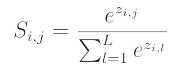

In [14]:
# outputs from a neural network layer
layer_outputs = [4.8, 1.21, 2.385]

# e - mathematical constant, we use E here to match a common coding 
# style where constants are uppercased
E = 2.71828182846 #you can also use math.e

# For each value in a vector, calculate the exponential value
exp_values = []
for output in layer_outputs:
    exp_values.append(E ** output)  # ** - power operator in Python


print('exponentiated values:')
print(exp_values)
# important to note - to calculate the probabilities we need non-negative values. 

exponentiated values:
[121.51041751893969, 3.3534846525504487, 10.85906266492961]


In [16]:
# normalization = take a given exponentiated value and divide it by the sum of all the exponentiated values
# Since each output value normalizes to a fraction of the sum, all the values are now a range of 0 to 1 and add up to 1
# The following is adding the sum and normalization to the code:

# Now normalize values
norm_base = sum(exp_values) # We sum all values
norm_values = []
for value in exp_values:
    norm_values.append(value / norm_base)
print('Normalized exponentiated values:')
print(norm_values)

print('Sum of normalized values:', sum(norm_values))
    


Normalized exponentiated values:
[0.8952826639573506, 0.024708306782070668, 0.08000902926057876]
Sum of normalized values: 1.0


In [17]:
# We can preform the same set of operations with the use of NumPy in the following way:

import numpy as np

# Values from earlier
layer_outputs = [4.8, 1.21, 2.385]

# For each value in a vector, calculate the exponential value
exp_values = np.exp(layer_outputs)  # E ** output
print('exponentiated values:')
print(exp_values)

# Now normalize values
norm_values = exp_values / np.sum(exp_values)
print('normalized exponentiated values:')
print(norm_values)
print('sum of normalized values:', np.sum(norm_values))

exponentiated values:
[121.51041752   3.35348465  10.85906266]
normalized exponentiated values:
[0.89528266 0.02470831 0.08000903]
sum of normalized values: 0.9999999999999999


In [ ]:
# To train batches we need to convert this funtionality to accept layer outputs in batches:

# Get unnormalized probabilities
exp_values = np.exp(inputs)

# Normalize them for each sample
probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
# in a 2d array/matrix, axis 0 refers to the rows, and axis 1 refers to the columns.

In [19]:
# Examples of how axis affects the sum using NumPy :

import numpy as np

layer_outputs = np.array([[4.8, 1.21, 2.835],
                          [8.9, -1.81, 0.2],
                          [1.41, 1.051, 0.026]])

# print(layer_outputs)
print('Sum without axis:')
print(np.sum(layer_outputs))

print('This will be identical to the above since default is None:')
print(np.sum(layer_outputs, axis=None))


Sum without axis:
18.621999999999996
This will be identical to the above since default is None:
18.621999999999996


With no axis specified we are just summing up all the values, even if they are varying in dimension


In [20]:
# axis 0

print('Another way to think of it w/ a matrix == axis 0: columns:')
print(np.sum(layer_outputs, axis=0))

Another way to think of it w/ a matrix == axis 0: columns:
[15.11   0.451  3.061]


This is not what we want though, we want to sum the rows

In [21]:
print('But we want to sum the rows instead, like this with raw python:')

for i in layer_outputs:
    print(sum(i))

But we want to sum the rows instead, like this with raw python:
8.844999999999999
7.29
2.4869999999999997


In [22]:
# Using NumPy:

print('So we can sum axis 1 but note the current shape:')
print(np.sum(layer_outputs, axis=1))

So we can sum axis 1 but note the current shape:
[8.845 7.29  2.487]


We want to simplify the outputs to a single value per sample. For that reason we need a column vector with these values since it will let us normalize the whole batch of samples, sample-wise, with a single calculation

In [23]:
print('Sum axis 1, but keep the same dimensions as input:')
print(np.sum(layer_outputs, axis=1, keepdims=True))


Sum axis 1, but keep the same dimensions as input:
[[8.845]
 [7.29 ]
 [2.487]]


With this, we keep the same dimensions as the input. Now, if we divide the array containing a batch of the outputs with this array, NumPy will preform this sample-wise. That means that it'll divide all the values from each output row by the corresponding row from the sum array. Since this sum in each row is a single value, it'll be used for the division with every value from the corresponding output row.

Combining this all into a softmax class:

In [25]:
# Softmax activation
class Activation_Softmax:
    
    # Forward pass
    def forward(self, inputs):
        
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = probabilities

We include the substraction of the largest input before we did the exponentiation to avoid exploding values. With softmax, thanks to normalization, we can substract any value from all of the inputs and it will not change the output....the relative proportions of the output probabilities do not change

In [28]:
softmax = Activation_Softmax()

softmax.forward([[1, 2, 3]])
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]


In [29]:
softmax.forward([[-2, -1, 0]]) # substracted 3 --max from the list
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]


In [30]:
# What if we divide the layer's output data by 2:

#  [1, 2, 3] ---> [0.5, 1, 1.5]

softmax.forward([[0.5, 1, 1.5]])
print(softmax.output)


[[0.18632372 0.30719589 0.50648039]]


The output confidences have changed due to the nonlinearity of the exponentiation. This is why we need to scale all the input data to a neural network in the same way.

Now we will add a new dense layer , setting it to have as many inputs as the previous layer has outputs and as many outputs as our data includes classes. Then we apply the softmax to this new layer:


In [ ]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create dense later with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)